In [1]:
import json
import pandas as pd
from pathlib import Path


def cal_accuracy(file_path  ):
    # 📖 读取数据
    with open(file_path, "r") as f:
        data = json.load(f)

    total = len(data)
    # 🔢 按trials_count统计数量


    trials_count = {}
    for item in data:
        count = item.get("trials_count", 0)
        if "trials_count" not in item:
            # print("trials_count not in item")
            # print(item.get("previous_attempts", []))
            count = item.get("step_n", 1) - 1
            # count = len(item.get("previous_attempts", []))

        if count not in trials_count:
            trials_count[count] = {"correct": 0, "incorrect": 0}
        if item["is_correct"]:
            trials_count[count]["correct"] += 1
        else:
            trials_count[count]["incorrect"] += 1

    # print(trials_count)

    # {0: {'correct': 35, 'incorrect': 0}, 4: {'correct': 2, 'incorrect': 55}, 3: {'correct': 4, 'incorrect': 0}, 1: {'correct': 3, 'incorrect': 0}, 2: {'correct': 1, 'incorrect': 0}}

    agg_correct = 0
    for count, item in trials_count.items():
        # print(f"trials_count: {count}, correct: {item['correct']}, incorrect: {item['incorrect']}")
        agg_correct += item["correct"]
        item["accuracy"] = agg_correct / total

    # print(trials_count)


    data_x = list(sorted(trials_count.keys()))
    data_y = sorted([trials_count[count]['accuracy'] for count in data_x])

    # display(data_x, data_y)
    return data_x, data_y

react_reflexion = "output/hotpot_react_reflexion_reflexion_gpt4o-mini.json"
react_reflexion_last_attempt = "output/hotpot_react_reflexion_last_attempt_and_reflexion_4o_mini.json"

cot_only = "output/hotpot_cot_COT_ONLY_4o_mini.json"
cot_reflexion = "output/hotpot_cot_COT_REFLEXION_4o_mini.json"


cot_gt = "output/hotpot_cot_COT_GT_4o_mini.json"
cot_gt_reflexion = "output/hotpot_cot_COT_GT_REFLEXION_4o_mini.json"
cot_gt_epm = "output/hotpot_cot_COT_GT_EPM_4o_mini.json"
cot_gt_epm_reflexion = "output/hotpot_cot_COT_GT_EPM_REFLEXION_4o_mini.json"


# data1 = cal_accuracy(react_reflexion)
# data2 = cal_accuracy(react_reflexion_last_attempt)

react_reflexion_data = cal_accuracy(react_reflexion)
react_rfx_last_attempt_data = cal_accuracy(react_reflexion_last_attempt)


cot_only_data = cal_accuracy(cot_only)
cot_reflexion_data = cal_accuracy(cot_reflexion)

cot_gt_data = cal_accuracy(cot_gt)
cot_gt_reflexion_data = cal_accuracy(cot_gt_reflexion)
cot_gt_epm_data = cal_accuracy(cot_gt_epm)
cot_gt_epm_reflexion_data = cal_accuracy(cot_gt_epm_reflexion)

# 派生 react only
react_only_data = ([0,1,2,3,4], [react_reflexion_data[1][0]] * 5)
# 对于不变的数据，改成四
cot_only_data = ([0,1,2,3,4], [cot_only_data[1][0]] * 5)
cot_gt_data = ([0,1,2,3,4], [cot_gt_data[1][0]] * 5)

# 对齐初始数据
cot_reflexion_data = ([0,1,2,3,4], [cot_only_data[1][0], cot_reflexion_data[1][1], cot_reflexion_data[1][2], cot_reflexion_data[1][3], cot_reflexion_data[1][4]])

cot_gt_reflexion_data = ([0,1,2,3,4], [cot_gt_data[1][0], cot_gt_reflexion_data[1][1], cot_gt_reflexion_data[1][2], cot_gt_reflexion_data[1][3], cot_gt_reflexion_data[1][4]])

cot_gt_epm_data = (
    cot_gt_epm_data[0],
    [
        cot_gt_data[1][0],
        *cot_gt_epm_data[1][1:],
    ])

cot_gt_epm_reflexion_data = (
    cot_gt_epm_reflexion_data[0],
    [
        cot_gt_data[1][0],
        *cot_gt_epm_reflexion_data[1][1:],
    ])

# print(react_rfx_data)
# print(react_only_data)
# print(cot_only_data)
# print(cot_reflexion_data)
# print(cot_gt_data)
# print(cot_gt_reflexion_data)
print(cot_gt_epm_data)
# print(cot_gt_epm_reflexion_data)

([0, 1, 2, 3, 4], [0.75, 0.88, 0.89, 0.91, 0.93])


react only 0.35
react reflexion 0.45
cot only 0.29
cot reflexion 0.42


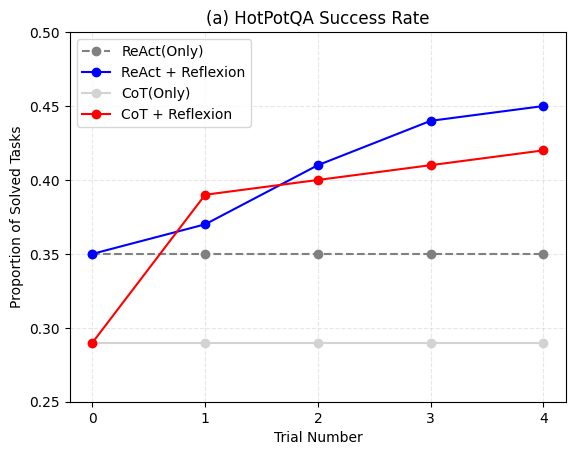

In [3]:
import matplotlib.pyplot as plt

print("react only", react_only_data[1][-1])
print("react reflexion", react_reflexion_data[1][-1])
print("cot only", cot_only_data[1][-1])
print("cot reflexion", cot_reflexion_data[1][-1])

plt.plot(react_only_data[0], react_only_data[1], 'o--', color='gray', label='ReAct(Only)')
plt.plot(react_reflexion_data[0], react_reflexion_data[1], 'o-', color='blue', label='ReAct + Reflexion')
plt.plot(cot_only_data[0], cot_only_data[1], 'o-', color='lightgray', label='CoT(Only)')
plt.plot(cot_reflexion_data[0], cot_reflexion_data[1], 'o-', color='red', label='CoT + Reflexion')

# 添加标题和标签
plt.title('(a) HotPotQA Success Rate')
plt.xlabel('Trial Number')
plt.ylabel('Proportion of Solved Tasks')
plt.ylim(0.25, 0.5)
# plt.xticks(["0","1","2","3","4"])
plt.xlim(-0.2, 4.2)  # 设置x轴范围从-0.2到6.2
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # 设置x轴刻度间隔为2
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # 将x轴刻度格式化为整数


# 添加图例
plt.legend()

# 显示网格
plt.grid(True, linestyle='--', alpha=0.3)



# 显示图形
plt.show()

cot gt 0.75
cot gt reflexion 0.88


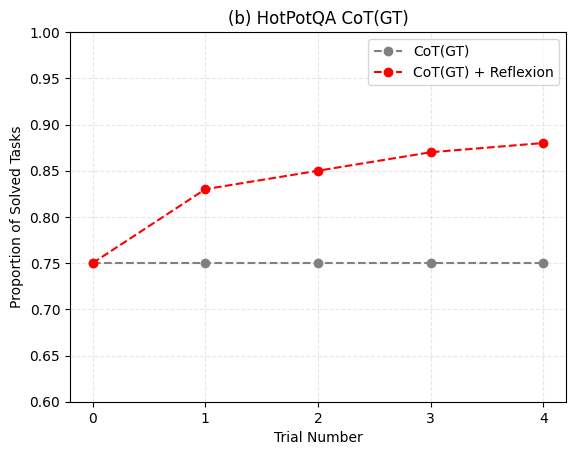

In [4]:
import matplotlib.pyplot as plt

# plt.plot(react_only_data[0], react_only_data[1], 'o--', color='gray', label='ReAct(Only)')
# plt.plot(react_reflexion_data[0], react_reflexion_data[1], 'o-', color='blue', label='ReAct + Reflexion')

print("cot gt", cot_gt_data[1][-1])
print("cot gt reflexion", cot_gt_reflexion_data[1][-1])

plt.plot(cot_gt_data[0], cot_gt_data[1], 'o--', color='gray', label='CoT(GT)')
plt.plot(cot_gt_reflexion_data[0], cot_gt_reflexion_data[1], 'o--', color='red', label='CoT(GT) + Reflexion')

# 添加标题和标签
plt.title('(b) HotPotQA CoT(GT)')
plt.xlabel('Trial Number')
plt.ylabel('Proportion of Solved Tasks')
plt.ylim(0.6, 1)
# plt.xticks(["0","1","2","3","4"])
plt.xlim(-0.2, 4.2)  # 设置x轴范围从-0.2到6.2
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # 设置x轴刻度间隔为2
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # 将x轴刻度格式化为整数


# 添加图例
plt.legend()

# 设置网格线为虚线,并添加透明度
plt.grid(True, linestyle='--', alpha=0.3)

# 显示图形
plt.show()

cot gt 0.75
cot gt epm 0.93
cot gt epm reflexion 0.96


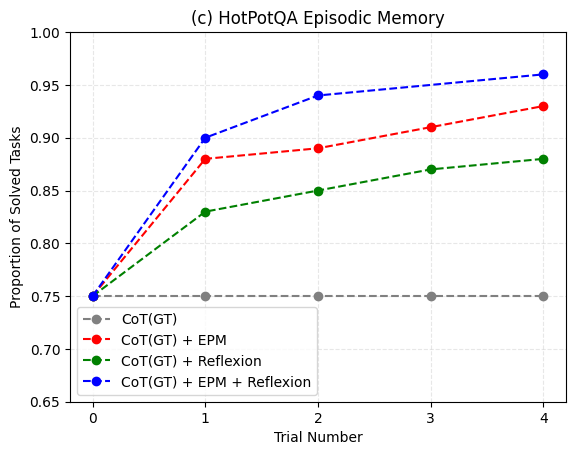

In [8]:
import matplotlib.pyplot as plt


print("cot gt", cot_gt_data[1][-1])
print("cot gt epm", cot_gt_epm_data[1][-1])
print("cot gt epm reflexion", cot_gt_epm_reflexion_data[1][-1])

# plt.plot(react_only_data[0], react_only_data[1], 'o--', color='gray', label='ReAct(Only)')
# plt.plot(react_reflexion_data[0], react_reflexion_data[1], 'o-', color='blue', label='ReAct + Reflexion')
plt.plot(cot_gt_data[0], cot_gt_data[1], 'o--', color='gray', label='CoT(GT)')
plt.plot(cot_gt_epm_data[0], cot_gt_epm_data[1], 'o--', color='red', label='CoT(GT) + EPM')
plt.plot(cot_gt_reflexion_data[0], cot_gt_reflexion_data[1], 'o--', color='green', label='CoT(GT) + Reflexion')
plt.plot(cot_gt_epm_reflexion_data[0], cot_gt_epm_reflexion_data[1], 'o--', color='blue', label='CoT(GT) + EPM + Reflexion')

# 添加标题和标签
plt.title('(c) HotPotQA Episodic Memory')
plt.xlabel('Trial Number')
plt.ylabel('Proportion of Solved Tasks')
plt.ylim(0.65, 1)
# plt.xticks(["0","1","2","3","4"])
plt.xlim(-0.2, 4.2)  # 设置x轴范围从-0.2到6.2
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))  # 设置x轴刻度间隔为2
plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%d'))  # 将x轴刻度格式化为整数


# 添加图例
plt.legend()

# 设置网格线为虚线,并添加透明度
plt.grid(True, linestyle='--', alpha=0.3)

# 显示图形
plt.show()